In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torchvision import transforms
from PIL import Image
from torchvision import models
from PIL import ImageOps

In [15]:
class_labels = {0: 'あ - a',
 1: 'い - i',
 2: 'う - u',
 3: 'え - e',
 4: 'お - o',
 5: 'か - ka',
 6: 'き - ki',
 7: 'く - ku',
 8: 'け - ke',
 9: 'こ - ko',
 10: 'さ - sa',
 11: 'し - shi',
 12: 'す - su',
 13: 'せ - se',
 14: 'そ - so',
 15: 'た - ta',
 16: 'ち - chi',
 17: 'つ - tsu',
 18: 'て - te',
 19: 'と - to',
 20: 'な - na',
 21: 'に - ni',
 22: 'ぬ - nu',
 23: 'ね - ne',
 24: 'の - no',
 25: 'は - ha',
 26: 'ひ - hi',
 27: 'ふ - fu',
 28: 'へ - he',
 29: 'ほ - ho',
 30: 'ま - ma',
 31: 'み - mi',
 32: 'む - mu',
 33: 'め - me',
 34: 'も - mo',
 35: 'や - ya',
 36: 'ゆ - yu',
 37: 'よ - yo',
 38: 'ら - ra',
 39: 'り - ri',
 40: 'る - ru',
 41: 'れ - re',
 42: 'ろ - ro',
 43: 'わ - wa',
 44: 'ゐ - wi',
 45: 'ゑ - we',
 46: 'を - wo',
 47: 'ん - n',
 48: 'ゝ'}

Predicted label: る - ru 40
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%
Class 10: 0.00%
Class 11: 0.00%
Class 12: 0.00%
Class 13: 0.00%
Class 14: 0.00%
Class 15: 0.01%
Class 16: 0.00%
Class 17: 0.00%
Class 18: 0.00%
Class 19: 0.00%
Class 20: 0.37%
Class 21: 0.00%
Class 22: 0.00%
Class 23: 0.00%
Class 24: 0.00%
Class 25: 0.00%
Class 26: 0.00%
Class 27: 0.00%
Class 28: 0.00%
Class 29: 0.00%
Class 30: 0.00%
Class 31: 0.00%
Class 32: 0.00%
Class 33: 0.00%
Class 34: 0.00%
Class 35: 0.00%
Class 36: 0.00%
Class 37: 0.00%
Class 38: 0.00%
Class 39: 0.00%
Class 40: 99.59%
Class 41: 0.00%
Class 42: 0.03%
Class 43: 0.00%
Class 44: 0.00%
Class 45: 0.00%
Class 46: 0.00%
Class 47: 0.00%
Class 48: 0.00%


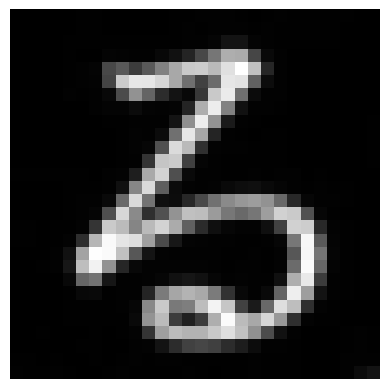

In [26]:
# Define the transformation for preprocessing the image
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

class MobileNet(nn.Module):
    def __init__(self, num_classes=49):
        # https://www.researchgate.net/publication/369777559_A_Robust_Residual_Shrinkage_Balanced_Network_for_Image_Recognition_from_Japanese_Historical_Documents
        super(MobileNet, self).__init__()
        self.mobilenet = models.mobilenet_v3_large(weights=None)
        # self.mobilenet = models.mobilenet_v3_large(weights="MobileNet_V3_Large_Weights.DEFAULT")
        self.mobilenet.features[0][0] = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        self.mobilenet.classifier[3] = nn.Linear(1280, num_classes)

    def forward(self, x):
        return self.mobilenet(x)

# Load your trained MobileNet model
model = torch.load('mobilenet-hiragana.pth')  # Update the path to your saved model
# Set the model to evaluation mode
model.eval()

# Load and preprocess the image
image = Image.open('test.jpg')  # Update the path to your test image
image = ImageOps.invert(image)
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

plt.imshow(input_tensor.permute(1, 2, 0), cmap="gray")
plt.axis('off')
#plt.title(dataset.classes[label])

# If you're using GPU, move the input batch to GPU
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')

# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Convert the output probabilities to predicted class index
probabilities = torch.softmax(output, dim=1)
predicted_class_index = torch.argmax(probabilities, dim=1).item()

# Get the label for the predicted class index
predicted_label = class_labels[predicted_class_index]

print("Predicted label:", predicted_label, predicted_class_index)

class_probabilities = probabilities.squeeze().tolist()

# Find the number of classes
num_classes = len(class_probabilities)

# Create a dictionary to store class counts
class_counts = {}

# Count the number of instances for each class
for i, prob in enumerate(class_probabilities):
    class_counts[i] = prob

# Calculate the total sum of probabilities
total_probability = sum(class_counts.values())

# Calculate the percentage of each class
class_percentages = {class_idx: (count / total_probability) * 100 for class_idx, count in class_counts.items()}

# Print the percentage of all classes
for class_idx, percentage in class_percentages.items():
    print(f"Class {class_idx}: {percentage:.2f}%")

